# Student Pass Prediction Project
*Author:* Shree Sinha  
*Date:* 23 Dec 2025  

*Objective:* Predict whether a student passes based on demographic, family, and study features using Machine Learning.

 # Problem Statement
We want to predict if a student will pass (G3 >= 10) based on their past grades, family background, study habits, and other factors.
This is an end-to-end ML pipeline including preprocessing, model training, evaluation, and feature importance analysis.

# Importing necessary libraries and functions

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix

# Loading the dataset and display first 5 rows 

In [6]:
df = pd.read_csv("student-mat.csv")
df.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


## Dataset Description and list of columns in dataset
- G1, G2: Grades in first and second period
- G3: Final grade (used to determine pass/fail)
- Other features: demographic, family, study habits, health, activities, etc.

In [7]:
df.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

# Created target variable: 1 → Pass, 0 → Fail

In [8]:
df['pass'] = (df['G3'] >= 10).astype(int)
df['pass'].value_counts()

pass
1    265
0    130
Name: count, dtype: int64

In [9]:
X = df.drop(['G3', 'pass'], axis=1)
y = df['pass']

num_features = X.select_dtypes(include=['int64','float64']).columns
cat_features = X.select_dtypes(include=['object']).columns

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

## Data Preprocessing
- Split features into *numeric* and *categorical*.  
- *Numeric features* were scaled using StandardScaler to normalize values.  
- *Categorical features* were encoded using OneHotEncoder to convert them into numeric format.  
- Preprocessing was implemented using a *ColumnTransformer* combined with each ML model in a pipeline for clean and reproducible workflows.

In [10]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

numeric_pipeline = Pipeline([
    ('scaler', StandardScaler())
])

categorical_pipeline = Pipeline([
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer([
    ('num', numeric_pipeline, num_features),
    ('cat', categorical_pipeline, cat_features)
])

## Machine Learning Models
We trained three models to predict student pass/fail:

1. *Logistic Regression*
   - Simple linear model
   - Provides baseline performance
2. *Decision Tree*
   - Captures nonlinear relationships
   - Easy to interpret
3. *Random Forest*
   - Ensemble of decision trees
   - Reduces overfitting
   - Achieved the *best performance* among the models

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline

log_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', LogisticRegression(max_iter=1000))
])

log_model.fit(X_train, y_train)
y_pred_log = log_model.predict(X_test)

In [12]:
from sklearn.tree import DecisionTreeClassifier

tree_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', DecisionTreeClassifier(random_state=42))
])

tree_model.fit(X_train, y_train)
y_pred_tree = tree_model.predict(X_test)

In [13]:
from sklearn.ensemble import RandomForestClassifier

rf_model = Pipeline([
    ('preprocess', preprocessor),
    ('model', RandomForestClassifier(n_estimators=100, random_state=42))
])

rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

## Model Evaluation
We evaluated models using the following metrics:

- *Accuracy:* Overall correctness of the model  
- *Precision:* Correctly predicted passes / All predicted passes  
- *Recall:* Correctly predicted passes / All actual passes  

| Model | Accuracy | Precision | Recall |
|-------|----------|-----------|--------|
| Logistic Regression | 0.91 | 0.94 | 0.92 |
| Decision Tree       | 0.84 |  0.88| 0.88 |
| Random Forest       | 0.91 | 0.94 | 0.92 |

*Confusion Matrix (Random Forest):*  
- True Positive (Pass correctly predicted)  
- True Negative (Fail correctly predicted)  
- False Positive / False Negative  

Random Forest performed best because it captures nonlinear relationships and reduces overfitting using ensemble averaging.

In [14]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

models = {
    "Logistic Regression": y_pred_log,
    "Decision Tree": y_pred_tree,
    "Random Forest": y_pred_rf
}

for name, preds in models.items():
    print(f"\n{name}")
    print("Accuracy:", accuracy_score(y_test, preds))
    print("Precision:", precision_score(y_test, preds))
    print("Recall:", recall_score(y_test, preds))


Logistic Regression
Accuracy: 0.9113924050632911
Precision: 0.9411764705882353
Recall: 0.9230769230769231

Decision Tree
Accuracy: 0.8481012658227848
Precision: 0.8846153846153846
Recall: 0.8846153846153846

Random Forest
Accuracy: 0.9113924050632911
Precision: 0.9411764705882353
Recall: 0.9230769230769231


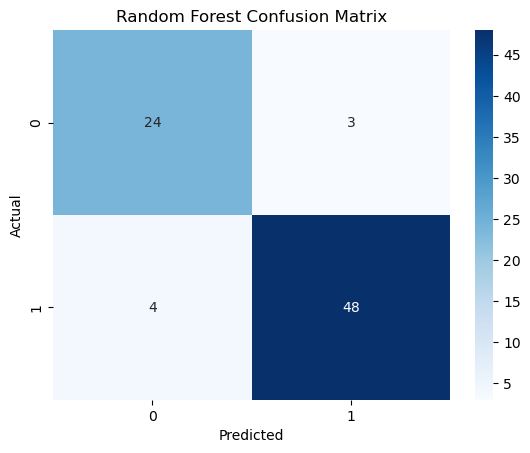

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Random Forest Confusion Matrix")
plt.show()

## Feature Importance (Random Forest)
- Top predictors of passing:
  - Study time, past failures, family support, health
- Random Forest helps us identify which features contribute most to the prediction.
- Visualizing feature importance allows us to explain the model to stakeholders and improve decision-making.

C:\Users\SHREE SINHA\AppData\Local\Temp\ipykernel_5160\1393692133.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')


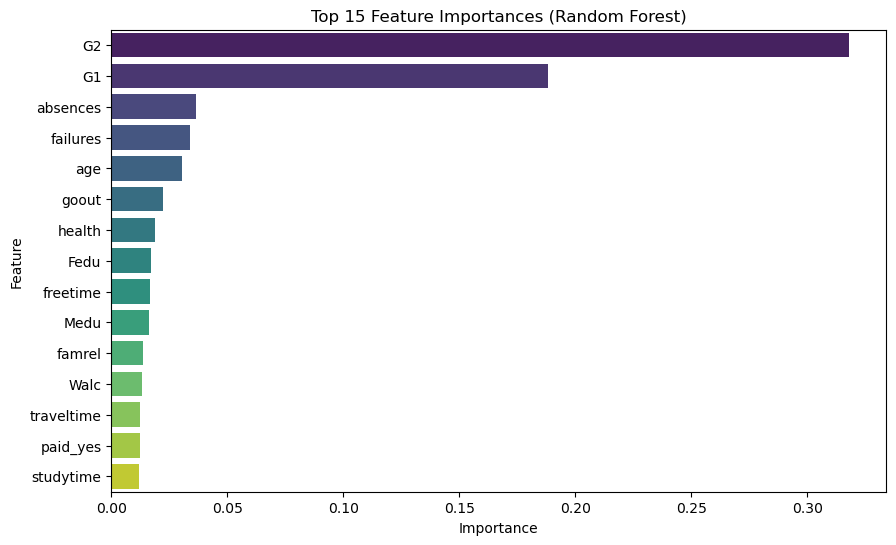

In [16]:
# Get feature importance from Random Forest
importances = rf_model.named_steps['model'].feature_importances_

# Get feature names after preprocessing
feature_names_num = num_features.tolist()
feature_names_cat = rf_model.named_steps['preprocess'].named_transformers_['cat']['encoder'].get_feature_names_out(cat_features)
all_features = feature_names_num + feature_names_cat.tolist()

# Create a DataFrame for plotting
feat_imp_df = pd.DataFrame({'Feature': all_features, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False).head(15)  # top 15

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_imp_df, palette='viridis')
plt.title("Top 15 Feature Importances (Random Forest)")
plt.show()

In [17]:
import joblib

# Save the entire pipeline
joblib.dump(rf_model, "student_pass_predictor.pkl")

# Load it back to test (optional)
loaded_model = joblib.load("student_pass_predictor.pkl")
y_pred_loaded = loaded_model.predict(X_test)
print("Accuracy of loaded model:", accuracy_score(y_test, y_pred_loaded))

Accuracy of loaded model: 0.9113924050632911


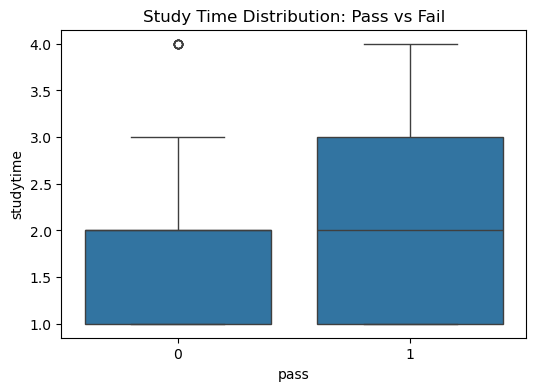

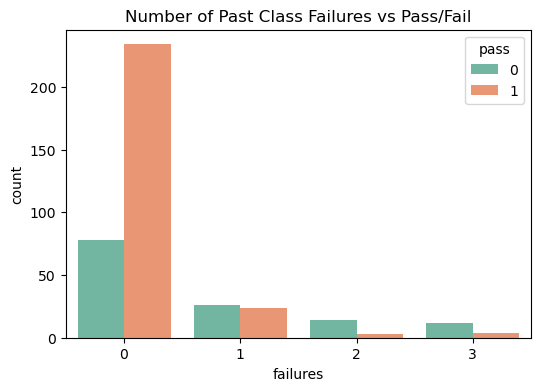

In [18]:
# Study time vs Pass/Fail
plt.figure(figsize=(6,4))
sns.boxplot(x='pass', y='studytime', data=df)
plt.title("Study Time Distribution: Pass vs Fail")
plt.show()

# Failures vs Pass/Fail
plt.figure(figsize=(6,4))
sns.countplot(x='failures', hue='pass', data=df, palette='Set2')
plt.title("Number of Past Class Failures vs Pass/Fail")
plt.show()

## Conclusion
- An end-to-end ML pipeline was implemented: data preprocessing, model training, evaluation, and feature importance analysis.  
- *Random Forest* achieved the highest accuracy and is the best model for this dataset.  
- Key insights:
  - Study habits and past academic performance are strong predictors of passing.
  - Family support and health also influence student performance.  
- The trained model is saved and ready for future predictions or deployment.  

This project demonstrates how to combine *data preprocessing, feature engineering, model training, evaluation, and deployment* in a professional workflow.